https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/

    


            Close     High    Low   Open    Volume
Date                                              
2010-06-29  23.89  25.0000  17.54  19.00  18783276
2010-06-30  23.83  30.4192  23.30  25.96  17194394
2010-07-01  21.96  25.9200  20.27  25.00   8216789
2010-07-02  19.20  23.1000  18.71  23.00   5135795
2010-07-05  19.20  19.2000  19.20  19.20         0


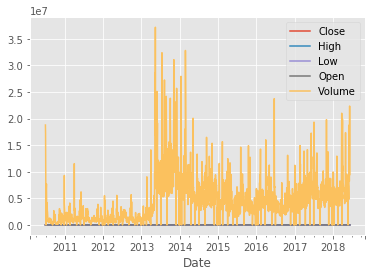

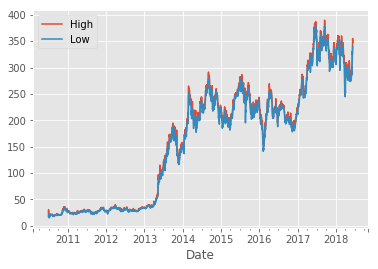

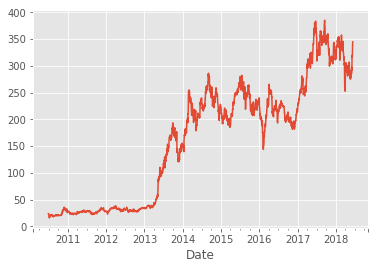

In [5]:
#############################################################################
# Intro and Getting Stock Price Data - Python Programming for Finance p.1

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web 

style.use('ggplot')

start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()

df = web.DataReader("TSLA", 'morningstar', start, end) 
# morningstar *****

df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)

print(df.head())

#############################################################################
# Handling Data and Graphing - Python Programming for Finance p.2

df.to_csv('TSLA.csv')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df.plot()
plt.show()

df[['High','Low']].plot()
plt.show()

df['Close'].plot()
plt.show()

            Close     High    Low   Open    Volume      100ma
Date                                                         
2010-06-29  23.89  25.0000  17.54  19.00  18783276  23.890000
2010-06-30  23.83  30.4192  23.30  25.96  17194394  23.860000
2010-07-01  21.96  25.9200  20.27  25.00   8216789  23.226667
2010-07-02  19.20  23.1000  18.71  23.00   5135795  22.220000
2010-07-05  19.20  19.2000  19.20  19.20         0  21.616000


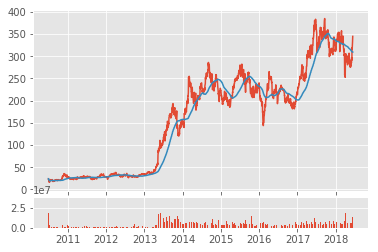

In [2]:
#############################################################################
#Basic stock data Manipulation - Python Programming for Finance p.3

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
#df['100ma'] = df['Adj Close'].rolling(window=100).mean() 
# Adj Close: for example, apple split when > 1000
#df['100ma'] = df['Close'].rolling(window=100).mean()
df['100ma'] = df['Close'].rolling(window=100,min_periods=0).mean() 
# to avoid the first 100 Nan data points
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [ ]:
#############################################################################
#More stock manipulations - Python Programming for Finance p.4

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

# make candlestick graphs
from matplotlib.finance import candlestick_ohlc
# matplotlib.finance is not part of matplotlib any more. You may get a copy of it as mpl_finance from GitHub as seen here. – ImportanceOfBeingErnest Mar 14 at 23:24

import matplotlib.dates as mdates

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()


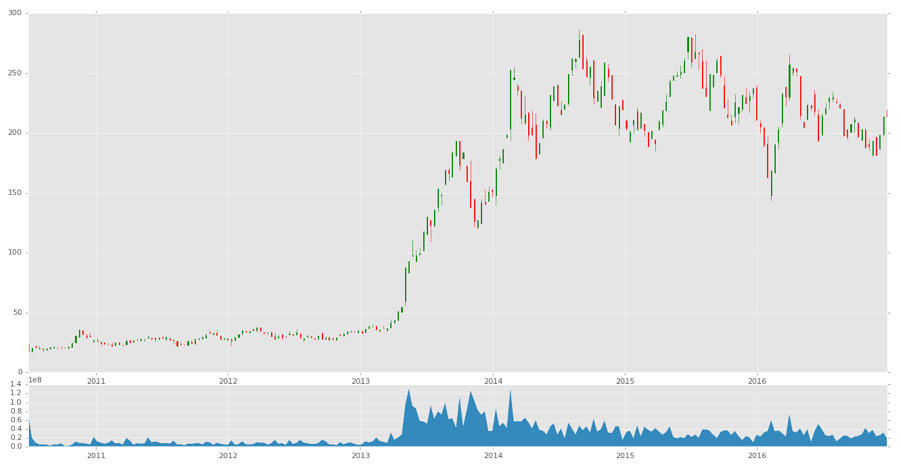

In [4]:

from IPython.display import Image
Image(filename = 'candlestick_and_volume_graph_matplotlib.png')

In [ ]:
#############################################################################
#Automating getting the S&P 500 list - Python Programming for Finance p.5

import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

In [33]:
#############################################################################
#Getting all company pricing data in the S&P 500 - Python Programming for Finance p.6

import bs4 as bs
import datetime as dt
import os
import pandas_datareader.data as web
import pickle
import requests


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    
    import time
    
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if ticker in ['ANDV','BKNG','BHF','CBRE','DWDP','DXC','EVRG','JEF','TPR','UAA','WELL']: continue
            # the files of these stocks cannot be downloaded
            
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            print('+{},'.format(ticker), end='')
        else:
            print('={},'.format(ticker), end='')
        
        mk = 0
        if ticker == 'WELL': mk = 1
        if mk: time.sleep(0.5)


get_data_from_yahoo()

=MMM,=ABT,=ABBV,=ABMD,=ACN,=ATVI,=AYI,=ADBE,=AMD,=AAP,=AES,=AET,=AMG,=AFL,=A,=APD,=AKAM,=ALK,=ALB,=ARE,=ALXN,=ALGN,=ALLE,=AGN,=ADS,=LNT,=ALL,=GOOGL,=GOOG,=MO,=AMZN,=AEE,=AAL,=AEP,=AXP,=AIG,=AMT,=AWK,=AMP,=ABC,=AME,=AMGN,=APH,=APC,=ADI,=ANSS,=ANTM,=AON,=AOS,=APA,=AIV,=AAPL,=AMAT,=APTV,=ADM,=ARNC,=AJG,=AIZ,=T,=ADSK,=ADP,=AZO,=AVB,=AVY,=BHGE,=BLL,=BAC,=BK,=BAX,=BBT,=BDX,=BRK.B,=BBY,=BIIB,=BLK,=HRB,=BA,=BWA,=BXP,=BSX,=BMY,=AVGO,=BF.B,=CHRW,=CA,=COG,=CDNS,=CPB,=COF,=CAH,=KMX,=CCL,=CAT,=CBOE,=CBS,=CELG,=CNC,=CNP,=CTL,=CERN,=CF,=SCHW,=CHTR,=CVX,=CMG,=CB,=CHD,=CI,=XEC,=CINF,=CTAS,=CSCO,=C,=CFG,=CTXS,=CLX,=CME,=CMS,=KO,=CTSH,=CL,=CMCSA,=CMA,=CAG,=CXO,=COP,=ED,=STZ,=COO,=GLW,=COST,=COTY,=CCI,=CSX,=CMI,=CVS,=DHI,=DHR,=DRI,=DVA,=DE,=DAL,=XRAY,=DVN,=DLR,=DFS,=DISCA,=DISCK,=DISH,=DG,=DLTR,=D,=DOV,=DPS,=DTE,=DRE,=DUK,=ETFC,=EMN,=ETN,=EBAY,=ECL,=EIX,=EW,=EA,=EMR,=ETR,=EVHC,=EOG,=EQT,=EFX,=EQIX,=EQR,=ESS,=EL,=ES,=RE,=EXC,=EXPE,=EXPD,=ESRX,=EXR,=XOM,=FFIV,=FB,=FAST,=FRT,=FDX,=FIS,=FITB,=FE,=FISV,=FLIR,=

In [37]:
with open("sp500tickers_backup.pickle", "rb") as f:
    tickers = pickle.load(f)
newlist = []
for ticker in tickers: 
    if ticker in ['ANDV','BKNG','BHF','CBRE','DWDP','DXC','EVRG','JEF','TPR','UAA','WELL']: continue
    newlist.append(ticker)
with open("sp500tickers.pickle", "wb") as f:
    pickle.dump(newlist, f)
    

In [43]:
#############################################################################
#Combining all S&P 500 company prices into one DataFrame - Python Programming for Finance p.7

import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

'''
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers
'''

# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if ticker in ['ANDV','BKNG','BHF','CBRE','DWDP','DXC','EVRG','JEF','TPR','UAA','WELL']: continue
            # the files of these stocks cannot be downloaded
            
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            print('+{},'.format(ticker), end='')
        else:
            print('={},'.format(ticker), end='')


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        #df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.rename(columns={'Close': ticker}, inplace=True)
        #df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
              MMM      ABT  ABBV  ABMD    ACN   ATVI    AYI   ADBE   AMD  \
Date                                                                       
2010-01-01  82.67  25.8328   NaN  8.73  41.50  11.11  35.64  36.78  9.68   
2010-01-04  83.02  26.0577   NaN  8.74  42.07  11.30  36.03  37.09  9.70   
2010-01-05  82.50  25.8471   NaN  8.53  42.33  11.32  36.33  37.70  9.71   
2010-01-06  83.67  25.9907   NaN  8.40  42.78  11.26  36.85  37.62  9.57   
2010-01-07  83.73  26.2060   NaN  8.40  42.74  10.99  38.00  36.89  9.47   

              AAP ...    WYNN    XEL      XRX   XLNX     XL  XYL      YUM  \
Date              ...                                                       
2010-01-01  40.48 ...   58.23  21.22  22.2887  25.06  18.33  NaN  25.0967   
2010-01-04  40.38 ...   63.96  21.08  22.7365  

In [ ]:
#############################################################################
#Creating massive S&P 500 company correlation table for Relationships - Python Programming for Finance p.8

import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

style.use('ggplot')


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        #df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.rename(columns={'Close': ticker}, inplace=True)
        #df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()


visualize_data()

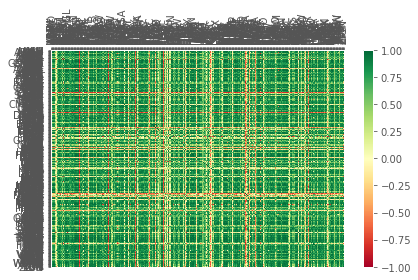

In [47]:
from IPython.display import Image
Image(filename = 'sp500corr.png')

In [ ]:
#############################################################################
#Preprocessing data to prepare for Machine Learning with stock data - Python Programming for Finance p.9

def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

In [ ]:
#############################################################################
#Creating targets for machine learning labels - Python Programming for Finance p.10 and 11

#target function for ML p.10

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

#Mapping targets for ML

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df

In [51]:
#############################################################################
#Machine learning against S&P 500 company prices - Python Programming for Finance p.12

import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
from collections import Counter
from sklearn import svm, cross_validation, neighbors
# need scikit-learn
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
#

style.use('ggplot')


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    #with open("sp500tickers.pickle", "wb") as f:
    with open("sp500tickers_new.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        #df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.rename(columns={'Close': ticker}, inplace=True)
        #df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df



def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
# examples of running:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

Data spread: Counter({'0': 910, '1': 670, '-1': 624})


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.41742286751361163


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


predicted class counts: Counter({0: 361, -1: 133, 1: 57})


Data spread: Counter({'1': 976, '-1': 813, '0': 415})


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.43920145190562615


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


predicted class counts: Counter({1: 302, -1: 246, 0: 3})


Data spread: Counter({'1': 802, '0': 791, '-1': 611})


/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.3393829401088929
predicted class counts: Counter({1: 206, -1: 173, 0: 172})




/Users/macssd/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.3393829401088929